Task 1: Regresión Lineal 

1.1 El coeficiente “3w2” representa cuanto cambia la variable dependiente “y” por cada unidad adicional de la característica "X2”. Siendo más específicos, por cada incremento de 1 en “X2”, “y "aumentara “3W2”
1.2 La multicolinealidad es cuando dos o más variables independientes están altamente relacionadas entre sí, causando que sea más dificultosa la tarea de saber cuál de ellos es realmente el responsable del cambio 


#TASK 2.0 Preparacion de dataset

Exploracion de datos inicial

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

filepath = "dataset_phishing.csv"
dataset = pd.read_csv(filepath)
#Exploracion de datos - Inciso 2.0
print("Distribución inicial de la columna 'status':")
print(dataset['status'].value_counts())
print("\nVerificacion de datos nulos")
print(dataset.isnull().sum())
print("\nResumen estadistico de los datos")
print(dataset.describe())




Distribución inicial de la columna 'status':
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Verificacion de datos nulos
url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

Resumen estadistico de los datos
         length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000  

Encoding de las columnas (Unicamente de la columna status)

In [2]:
#Encoding de las columnas
# Ignorar la columna URL
if 'url' in dataset.columns:
    dataset = dataset.drop(columns=['url'])
# Codificar la columna status
if 'status' in dataset.columns:
    label_encoder = LabelEncoder()
    dataset['status'] = label_encoder.fit_transform(dataset['status'])

# Mostrar las primeras filas del dataset modificado
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

(   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
 0          37               19   0        3           0      0      0       0   
 1          77               23   1        1           0      0      0       0   
 2         126               50   1        4           1      0      1       2   
 3          18               11   0        2           0      0      0       0   
 4          55               15   0        2           2      0      0       0   
 
    nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \
 0      0      0  ...                0                      1   
 1      0      0  ...                1                      0   
 2      0      3  ...                1                      0   
 3      0      0  ...                1                      0   
 4      0      0  ...                0                      1   
 
    whois_registered_domain  domain_registration_length  domain_age  \
 0                        0                

Revision de balanceo de dataset

In [3]:
# Verificar la distribución de las clases en la columna 'status'
class_distribution = dataset['status'].value_counts()
class_distribution_percentage = dataset['status'].value_counts(normalize=True) * 100

class_distribution, class_distribution_percentage


(status
 0    5715
 1    5715
 Name: count, dtype: int64,
 status
 0    50.0
 1    50.0
 Name: proportion, dtype: float64)

Verificacion si es necesario el escalamiento de variables

In [4]:
# Calcular el rango (mínimo y máximo) de las características numéricas
feature_ranges = dataset.drop(columns=['status']).agg(['min', 'max']).T
feature_ranges['range'] = feature_ranges['max'] - feature_ranges['min']
feature_ranges_sorted = feature_ranges.sort_values('range', ascending=False)
feature_ranges_sorted.head()




,min,max,range
web_traffic,0.0,10767986.0,10767986.0
domain_registration_length,-1.0,29829.0,29830.0
domain_age,-12.0,12874.0,12886.0
nb_hyperlinks,0.0,4659.0,4659.0
length_url,12.0,1641.0,1629.0


Escalamiento de variables

In [5]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la etiqueta
X = dataset.drop(columns=['status'])
y = dataset['status']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir X_scaled de nuevo a un DataFrame para mantener las columnas originales
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del dataset escalado
X_scaled_df.head()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355


In [6]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar la distribución de clases en los conjuntos
train_distribution = y_train.value_counts(normalize=True) * 100
test_distribution = y_test.value_counts(normalize=True) * 100

X_train.shape, X_test.shape, train_distribution, test_distribution


((9144, 87),
 (2286, 87),
 status
 0    50.0
 1    50.0
 Name: proportion, dtype: float64,
 status
 1    50.0
 0    50.0
 Name: proportion, dtype: float64)

Task 2.1 - Regresión Logística 

2.1 Sin librerias



In [1]:
import math

# Constante e (aproximación)
E = 2.718281828459045

# Función sigmoide
def sigmoid(z):
    """Calcula la función sigmoide."""
    return 1 / (1 + E**-z)

# Función logaritmo natural (aproximación con serie de Taylor)
def log(x, iterations=100):
    """Aproximación del logaritmo natural usando la serie de Taylor."""
    if x <= 0:
        raise ValueError("El logaritmo no está definido para valores <= 0")
    if x > 2:
        return log(x/E) + 1
    elif x < 0.5:
      return log(x*E) - 1
    n = (x - 1) / (x + 1)
    result = 0
    for i in range(1, iterations * 2, 2):
        result += (1 / i) * (n ** i)
    return 2 * result

# Función de costo
def compute_cost(X, y, theta):
    """Calcula el costo logístico sin regularización."""
    m = len(y)
    cost = 0
    for i in range(m):
        z = sum(X[i][j] * theta[j] for j in range(len(theta)))
        h = sigmoid(z)
        cost += -y[i] * log(h) - (1 - y[i]) * log(1 - h)
    return cost / m

# Gradiente descendente
def gradient_descent(X, y, theta, learning_rate, epochs):
    """Implementa gradiente descendente para optimizar los pesos."""
    m = len(y)
    cost_history = []
    for _ in range(epochs):
        gradients = [0] * len(theta)
        for i in range(m):
            z = sum(X[i][j] * theta[j] for j in range(len(theta)))
            h = sigmoid(z)
            for j in range(len(theta)):
                gradients[j] += (h - y[i]) * X[i][j]
        for j in range(len(theta)):
            theta[j] -= learning_rate * gradients[j] / m
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Generar datos sintéticos
import random
random.seed(42)

num_samples = 300
X = []
y = []

for _ in range(num_samples):
    x1 = random.gauss(2, 1)
    x2 = random.gauss(-2, 1)
    label = 1 if x1 + x2 > 0 else 0
    X.append([1, x1, x2])  # Agregar el término de sesgo (1)
    y.append(label)

# Inicializar parámetros
theta = [0] * len(X[0])
learning_rate = 0.01
epochs = 1000

# Entrenar el modelo
theta, cost_history = gradient_descent(X, y, theta, learning_rate, epochs)

# Mostrar la evolución del costo (primeras 10 épocas)
print("Evolución del costo por épocas (primeras 10):")
for epoch, cost in enumerate(cost_history[:10]):
    print(f"Época {epoch + 1}: Costo = {cost:.4f}")

# Mostrar los parámetros finales
print("\nParámetros finales del modelo:")
for i, param in enumerate(theta):
    print(f"Theta {i}: {param:.4f}")

# Mostrar algunos ejemplos clasificados
print("\nEjemplos clasificados:")
for i in range(10):
    z = sum(X[i][j] * theta[j] for j in range(len(theta)))
    h = sigmoid(z)
    prediccion = 1 if h >= 0.5 else 0
    print(f"Real: {y[i]}, Predicción: {prediccion}, Probabilidad: {h:.4f}")

Evolución del costo por épocas (primeras 10):
Época 1: Costo = 0.6916
Época 2: Costo = 0.6901
Época 3: Costo = 0.6886
Época 4: Costo = 0.6871
Época 5: Costo = 0.6856
Época 6: Costo = 0.6841
Época 7: Costo = 0.6826
Época 8: Costo = 0.6811
Época 9: Costo = 0.6797
Época 10: Costo = 0.6782

Parámetros finales del modelo:
Theta 0: -0.0316
Theta 1: 1.2960
Theta 2: 1.3510

Ejemplos clasificados:
Real: 0, Predicción: 0, Probabilidad: 0.3631
Real: 1, Predicción: 1, Probabilidad: 0.6598
Real: 0, Predicción: 0, Probabilidad: 0.0887
Real: 1, Predicción: 0, Probabilidad: 0.4820
Real: 0, Predicción: 0, Probabilidad: 0.4338
Real: 1, Predicción: 1, Probabilidad: 0.8496
Real: 1, Predicción: 1, Probabilidad: 0.7024
Real: 0, Predicción: 0, Probabilidad: 0.0780
Real: 1, Predicción: 1, Probabilidad: 0.8753
Real: 0, Predicción: 0, Probabilidad: 0.4425


2.1 Código con librerias

Precisión del modelo (scikit-learn): 0.9889

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.97      0.99        35

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Matriz de confusión:
[[55  0]
 [ 1 34]]


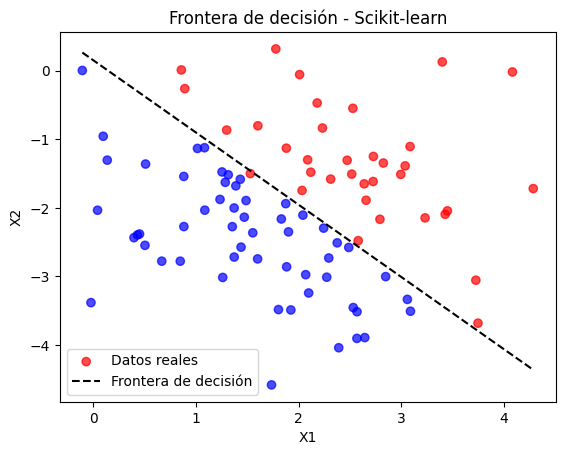

In [3]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import random

# Generar los mismos datos sintéticos
random.seed(42)
np.random.seed(42)

num_samples = 300
X = []
y = []

for _ in range(num_samples):
    x1 = random.gauss(2, 1)
    x2 = random.gauss(-2, 1)
    label = 1 if x1 + x2 > 0 else 0
    X.append([x1, x2])  # Sin incluir el término de sesgo, ya que scikit-learn lo agrega automáticamente
    y.append(label)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo (scikit-learn): {accuracy:.4f}")

# Mostrar métricas adicionales
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualizar los datos y la frontera de decisión
import matplotlib.pyplot as plt

# Preparar datos para la frontera de decisión
coef = model.coef_[0]
intercept = model.intercept_[0]

x_values = np.linspace(min([x[0] for x in X_test]), max([x[0] for x in X_test]), 100)
y_values = -(intercept + coef[0] * x_values) / coef[1]

# Gráfico
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c=y_test, cmap='bwr', alpha=0.7, label="Datos reales")
plt.plot(x_values, y_values, color="black", linestyle="--", label="Frontera de decisión")
plt.title("Frontera de decisión - Scikit-learn")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


Repita los pasos para entrenar su modelo, pero ahora usando librerías, y compare los resultados. 
Para esta parte sí puede usar herramientas de Al generativas. 
Responda: ¿Cuál implementación fue mejor? ¿Por qué?

La implementación con librerías fue claramente mejor debido a su mayor precisión (98.89%), métricas detalladas y una mayor eficiencia en el tiempo de ejecución: sin librerías el tiempo es de 6.6 s, mientras que con librerías es de 2.5 s, dejando un claro ganador en términos de eficiencia de tiempo al código con librerías. Esto se debe a la optimización en scikit-learn, como el manejo óptimo del gradiente descendente, la convergencia más rápida y el cálculo más preciso. El código sin librerías es más propenso a errores y requiere más tiempo de desarrollo, lo cual lo hace menos práctico.

# Task 2.2

Código sin librerias

------------Código sin librerias------------
Precisión del modelo KNN: 0.97


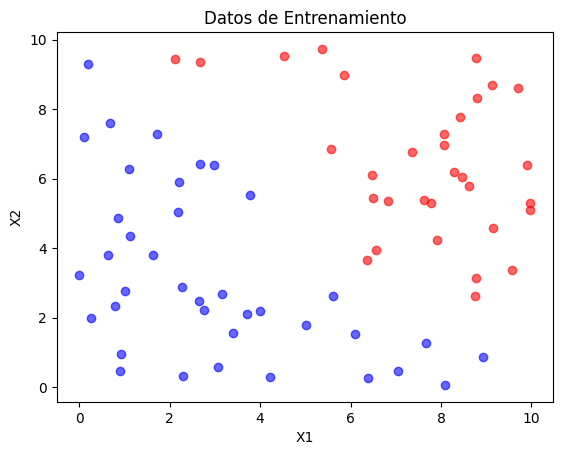

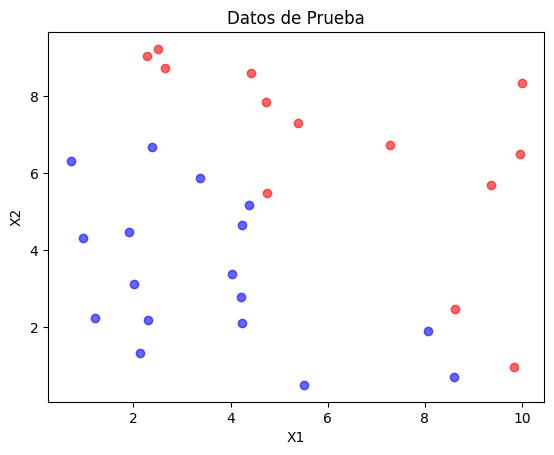

In [10]:
# Función para calcular la distancia euclidiana entre dos puntos
def calcular_distancia(punto1, punto2):
    """Calcula la distancia euclidiana entre dos puntos."""
    suma = 0
    i = 0
    while i < len(punto1):
        suma += (punto1[i] - punto2[i]) ** 2
        i += 1
    return suma ** 0.5  # Raíz cuadrada de la suma

# Algoritmo KNN básico
def knn(predecir_punto, datos_entrenamiento, etiquetas_entrenamiento, k):
    """
    Predice la clase de un punto usando KNN.
    - predecir_punto: El punto que queremos clasificar.
    - datos_entrenamiento: Los puntos de entrenamiento (X).
    - etiquetas_entrenamiento: Las etiquetas correspondientes (y).
    - k: Número de vecinos a considerar.
    """
    # Calcular distancias entre el punto y todos los puntos de entrenamiento
    distancias = []
    i = 0
    while i < len(datos_entrenamiento):
        distancia = calcular_distancia(predecir_punto, datos_entrenamiento[i])
        distancias.append((distancia, etiquetas_entrenamiento[i]))  # Guardar distancia y etiqueta
        i += 1

    # Ordenar las distancias (de menor a mayor)
    distancias.sort(key=lambda x: x[0])

    # Tomar las etiquetas de los k vecinos más cercanos
    vecinos_cercanos = distancias[:k]

    # Votar por la clase más común
    votos = {}
    i = 0
    while i < len(vecinos_cercanos):
        etiqueta = vecinos_cercanos[i][1]
        if etiqueta not in votos:
            votos[etiqueta] = 0
        votos[etiqueta] += 1
        i += 1

    # Retornar la clase con más votos
    return max(votos, key=votos.get)

# Evaluar la precisión del modelo
def calcular_precision(datos_prueba, etiquetas_prueba, datos_entrenamiento, etiquetas_entrenamiento, k):
    """Calcula la precisión del modelo KNN."""
    aciertos = 0
    i = 0
    while i < len(datos_prueba):
        prediccion = knn(datos_prueba[i], datos_entrenamiento, etiquetas_entrenamiento, k)
        if prediccion == etiquetas_prueba[i]:
            aciertos += 1
        i += 1
    return aciertos / len(datos_prueba)

# Generar datos simples (sintéticos)
import random
random.seed(42)
print("------------Código sin librerias------------")

datos = []
etiquetas = []

i = 0
while i < 100:
    x1 = random.uniform(0, 10)  # Valores entre 0 y 10
    x2 = random.uniform(0, 10)  # Valores entre 0 y 10
    if x1 + x2 > 10:  # Clasificación simple: si la suma es mayor que 10, es clase 1
        etiquetas.append(1)
    else:
        etiquetas.append(0)
    datos.append([x1, x2])
    i += 1

# Dividir datos en entrenamiento (70%) y prueba (30%)
division = int(0.7 * len(datos))
datos_entrenamiento = datos[:division]
etiquetas_entrenamiento = etiquetas[:division]
datos_prueba = datos[division:]
etiquetas_prueba = etiquetas[division:]

# Definir el valor de k
k = 3

# Calcular precisión
precision = calcular_precision(datos_prueba, etiquetas_prueba, datos_entrenamiento, etiquetas_entrenamiento, k)
print(f"Precisión del modelo KNN: {precision:.2f}")

# Graficar los resultados
def graficar_datos(datos, etiquetas, titulo):
    """Muestra un gráfico con los puntos y sus clases."""
    i = 0
    while i < len(datos):
        if etiquetas[i] == 1:
            color = "red"
        else:
            color = "blue"
        plt.scatter(datos[i][0], datos[i][1], color=color, alpha=0.6)
        i += 1
    plt.title(titulo)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

# Graficar los datos de entrenamiento
import matplotlib.pyplot as plt
graficar_datos(datos_entrenamiento, etiquetas_entrenamiento, "Datos de Entrenamiento")
graficar_datos(datos_prueba, etiquetas_prueba, "Datos de Prueba")


 Código con librerias

Código con librerias
Precisión del modelo KNN (con librerías): 0.9778

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.96      1.00      0.98        46

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90


Matriz de confusión:
[[42  2]
 [ 0 46]]


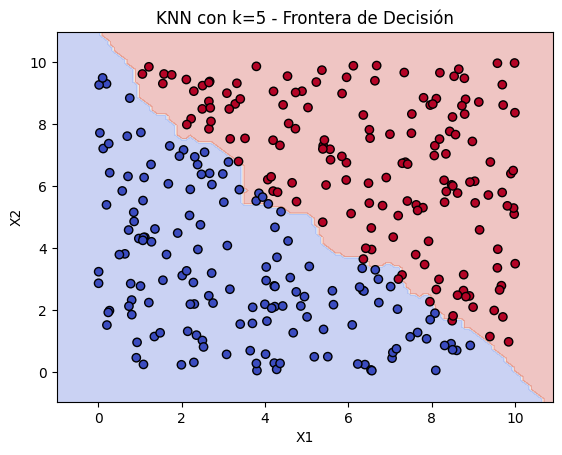

In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import random

# Generar datos sintéticos
print("------------Código con librerias------------")
random.seed(42)
np.random.seed(42)

# Crear datos simples
X = []
y = []

for _ in range(300):
    x1 = random.uniform(0, 10)
    x2 = random.uniform(0, 10)
    label = 1 if x1 + x2 > 10 else 0  # Clasificación simple
    X.append([x1, x2])
    y.append(label)

X = np.array(X)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo KNN
k = 5  # Valor de k
knn_model = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN (con librerías): {accuracy:.4f}")

# Mostrar métricas de desempeño
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualizar la frontera de decisión
def plot_decision_boundary(X, y, model, k):
    """Grafica los datos y la frontera de decisión para KNN."""
    # Crear un grid de valores para graficar
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predecir en cada punto del grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(f"KNN con k={k} - Frontera de Decisión")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

# Llamar a la función de visualización
plot_decision_boundary(X, y, knn_model, k)


La implementación con librerías fue mejor por su mayor precisión (97.78% a comparación a 97%) y a la inclusión de métricas detalladas como precisión, recall, F1-score y matriz de confusión, que permiten un análisis más completo del modelo. El código con librerías es más eficiente, como lo demuestra su menor tiempo de ejecución (0.2s frente a 0.4s). Mientras, el uso de librerías como scikit-learn es claramente más práctico y adecuado para resolver problemas reales.